# Exploratory data analysis

https://www.kaggle.com/datasets/joebeachcapital/cirrhosis-patient-survival-prediction

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from scipy import stats

In [2]:
data = pd.read_csv('data/trainset.csv')

In [3]:
data.head()

id  N_Days             Drug    Age Sex Ascites Hepatomegaly Spiders Edema  \
0   0     999  D-penicillamine  21532   M       N            N       N     N   
1   1    2574          Placebo  19237   F       N            N       N     N   
2   2    3428          Placebo  13727   F       N            Y       Y     Y   
3   3    2576          Placebo  18460   F       N            N       N     N   
4   4     788          Placebo  16658   F       N            Y       N     N   

   Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  Tryglicerides  \
0        2.3        316.0     3.35   172.0    1601.0  179.80           63.0   
1        0.9        364.0     3.54    63.0    1440.0  134.85           88.0   
2        3.3        299.0     3.55   131.0    1029.0  119.35           50.0   
3        0.6        256.0     3.50    58.0    1653.0   71.30           96.0   
4        1.1        346.0     3.65    63.0    1181.0  125.55           96.0   

   Platelets  Prothrombin  Stage Status  
0      394.0          9.7    3.0      D  
1      361.0         11.0    3.0      C  
2      199.0         11.7    4.0      D  
3      269.0         10.7    3.0      C  
4      298.0         10.6    4.0      C

In [4]:
if len(data.id.unique()) == data.shape[0]:
    data.drop(['id'], axis=1, inplace=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         7905 non-null   int64  
 1   Drug           7905 non-null   object 
 2   Age            7905 non-null   int64  
 3   Sex            7905 non-null   object 
 4   Ascites        7905 non-null   object 
 5   Hepatomegaly   7905 non-null   object 
 6   Spiders        7905 non-null   object 
 7   Edema          7905 non-null   object 
 8   Bilirubin      7902 non-null   float64
 9   Cholesterol    7905 non-null   float64
 10  Albumin        7896 non-null   float64
 11  Copper         7895 non-null   float64
 12  Alk_Phos       7905 non-null   float64
 13  SGOT           7905 non-null   float64
 14  Tryglicerides  7904 non-null   float64
 15  Platelets      7905 non-null   float64
 16  Prothrombin    7905 non-null   float64
 17  Stage          7905 non-null   float64
 18  Status  

In [6]:
data.describe()

N_Days           Age    Bilirubin  Cholesterol      Albumin  \
count  7905.000000   7905.000000  7902.000000  7905.000000  7896.000000   
mean   2030.173308  18373.146490     2.595115   350.561923     3.548276   
std    1094.233744   3679.958739     3.813540   195.379344     0.346237   
min      41.000000   9598.000000     0.300000   120.000000     1.960000   
25%    1230.000000  15574.000000     0.700000   248.000000     3.350000   
50%    1831.000000  18713.000000     1.100000   298.000000     3.580000   
75%    2689.000000  20684.000000     3.000000   390.000000     3.770000   
max    4795.000000  28650.000000    28.000000  1775.000000     4.640000   

            Copper      Alk_Phos         SGOT  Tryglicerides    Platelets  \
count  7895.000000   7905.000000  7905.000000    7904.000000  7905.000000   
mean     83.940089   1816.745250   114.604602     115.331351   265.228969   
std      75.931802   1903.750657    48.790945      52.527880    87.465579   
min       4.000000    289.000000    26.350000      33.000000    62.000000   
25%      39.000000    834.000000    75.950000      84.000000   211.000000   
50%      63.000000   1181.000000   108.500000     104.000000   265.000000   
75%     102.000000   1857.000000   137.950000     139.000000   316.000000   
max     588.000000  13862.400000   457.250000     598.000000   563.000000   

       Prothrombin        Stage  
count  7905.000000  7905.000000  
mean     10.629462     3.032511  
std       0.781735     0.866511  
min       9.000000     1.000000  
25%      10.000000     2.000000  
50%      10.600000     3.000000  
75%      11.000000     4.000000  
max      18.000000     4.000000

In [7]:
data['Status'].value_counts(normalize=True)

Status
C     0.628083
D     0.337128
CL    0.034788
Name: proportion, dtype: float64

In [8]:
spliter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in spliter.split(data.iloc[:,:-1], data.iloc[:,-1]):
    for train_index, valid_index in spliter.split(data.iloc[train_index,:-1], data.iloc[train_index,-1]):
        train_data = data.iloc[train_index,:]
        train_data = train_data.reset_index(drop=True)
        
        validation_data = data.iloc[valid_index,:]
        validation_data = validation_data.reset_index(drop=True)
        
        test_data = data.iloc[test_index,:]
        test_data = test_data.reset_index(drop=True)

In [9]:
def data_c(data):
    return data.iloc[:,-1:].value_counts(normalize=True).sort_index()
    
td = data_c(train_data)
vd = data_c(validation_data) 
ted = data_c(test_data)

pd.concat([td, vd, ted], axis=1, keys=['train_split', 'validation_split', 'test_split'])

train_split  validation_split  test_split
Status                                           
C          0.634117          0.612648    0.628083
CL         0.033801          0.041107    0.034788
D          0.332081          0.346245    0.337128

In [10]:
all_columns = list(data.columns)
categorical_columns = [all_columns[1]] + all_columns[3:8] + [all_columns[-2]]
target = all_columns[-1]
numerical_columns = [ i for i in all_columns if i not in categorical_columns and i != target]

## Handling missing data

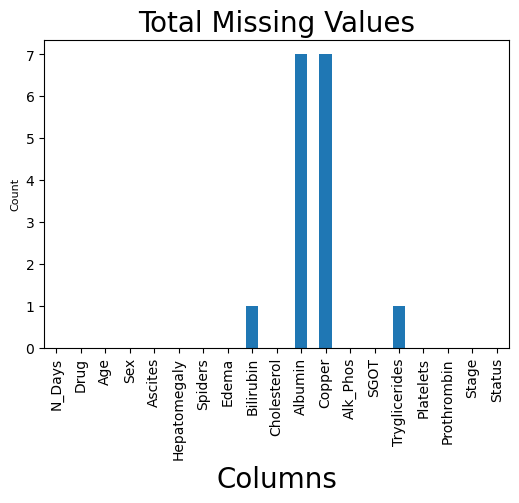

In [11]:
if train_data.isnull().sum().sum() == 0:
    print('you already handeled missing features!')
else:
    total_select = train_data.isnull().sum()
    
    total_select.plot(kind="bar", figsize = (6,4), fontsize = 10)
    
    plt.xlabel("Columns", fontsize = 20)
    plt.ylabel("Count", fontsize = 8)
    plt.title("Total Missing Values", fontsize = 20)    

In [12]:
for i in data.columns.tolist():
    if i in numerical_columns:
        mean = np.mean(train_data[i])
        train_data[i].fillna(value=mean, inplace=True)
        validation_data[i].fillna(value=mean, inplace=True)
        test_data[i].fillna(value=mean, inplace=True)
if train_data.isnull().sum().sum() != 0:
    print('you have missing values.')
else:
    print('done')

done


In [13]:
train_data[categorical_columns]

Drug Sex Ascites Hepatomegaly Spiders Edema  Stage
0             Placebo   F       N            Y       N     N    2.0
1     D-penicillamine   F       N            Y       N     N    3.0
2             Placebo   F       N            Y       N     N    3.0
3             Placebo   F       N            Y       N     N    4.0
4             Placebo   F       N            N       N     N    1.0
...               ...  ..     ...          ...     ...   ...    ...
5054          Placebo   F       N            Y       N     N    3.0
5055          Placebo   F       N            N       N     N    3.0
5056          Placebo   F       N            N       N     N    2.0
5057          Placebo   F       N            N       N     N    3.0
5058  D-penicillamine   F       N            N       N     N    2.0

[5059 rows x 7 columns]

## Categroical data alongside target in bars

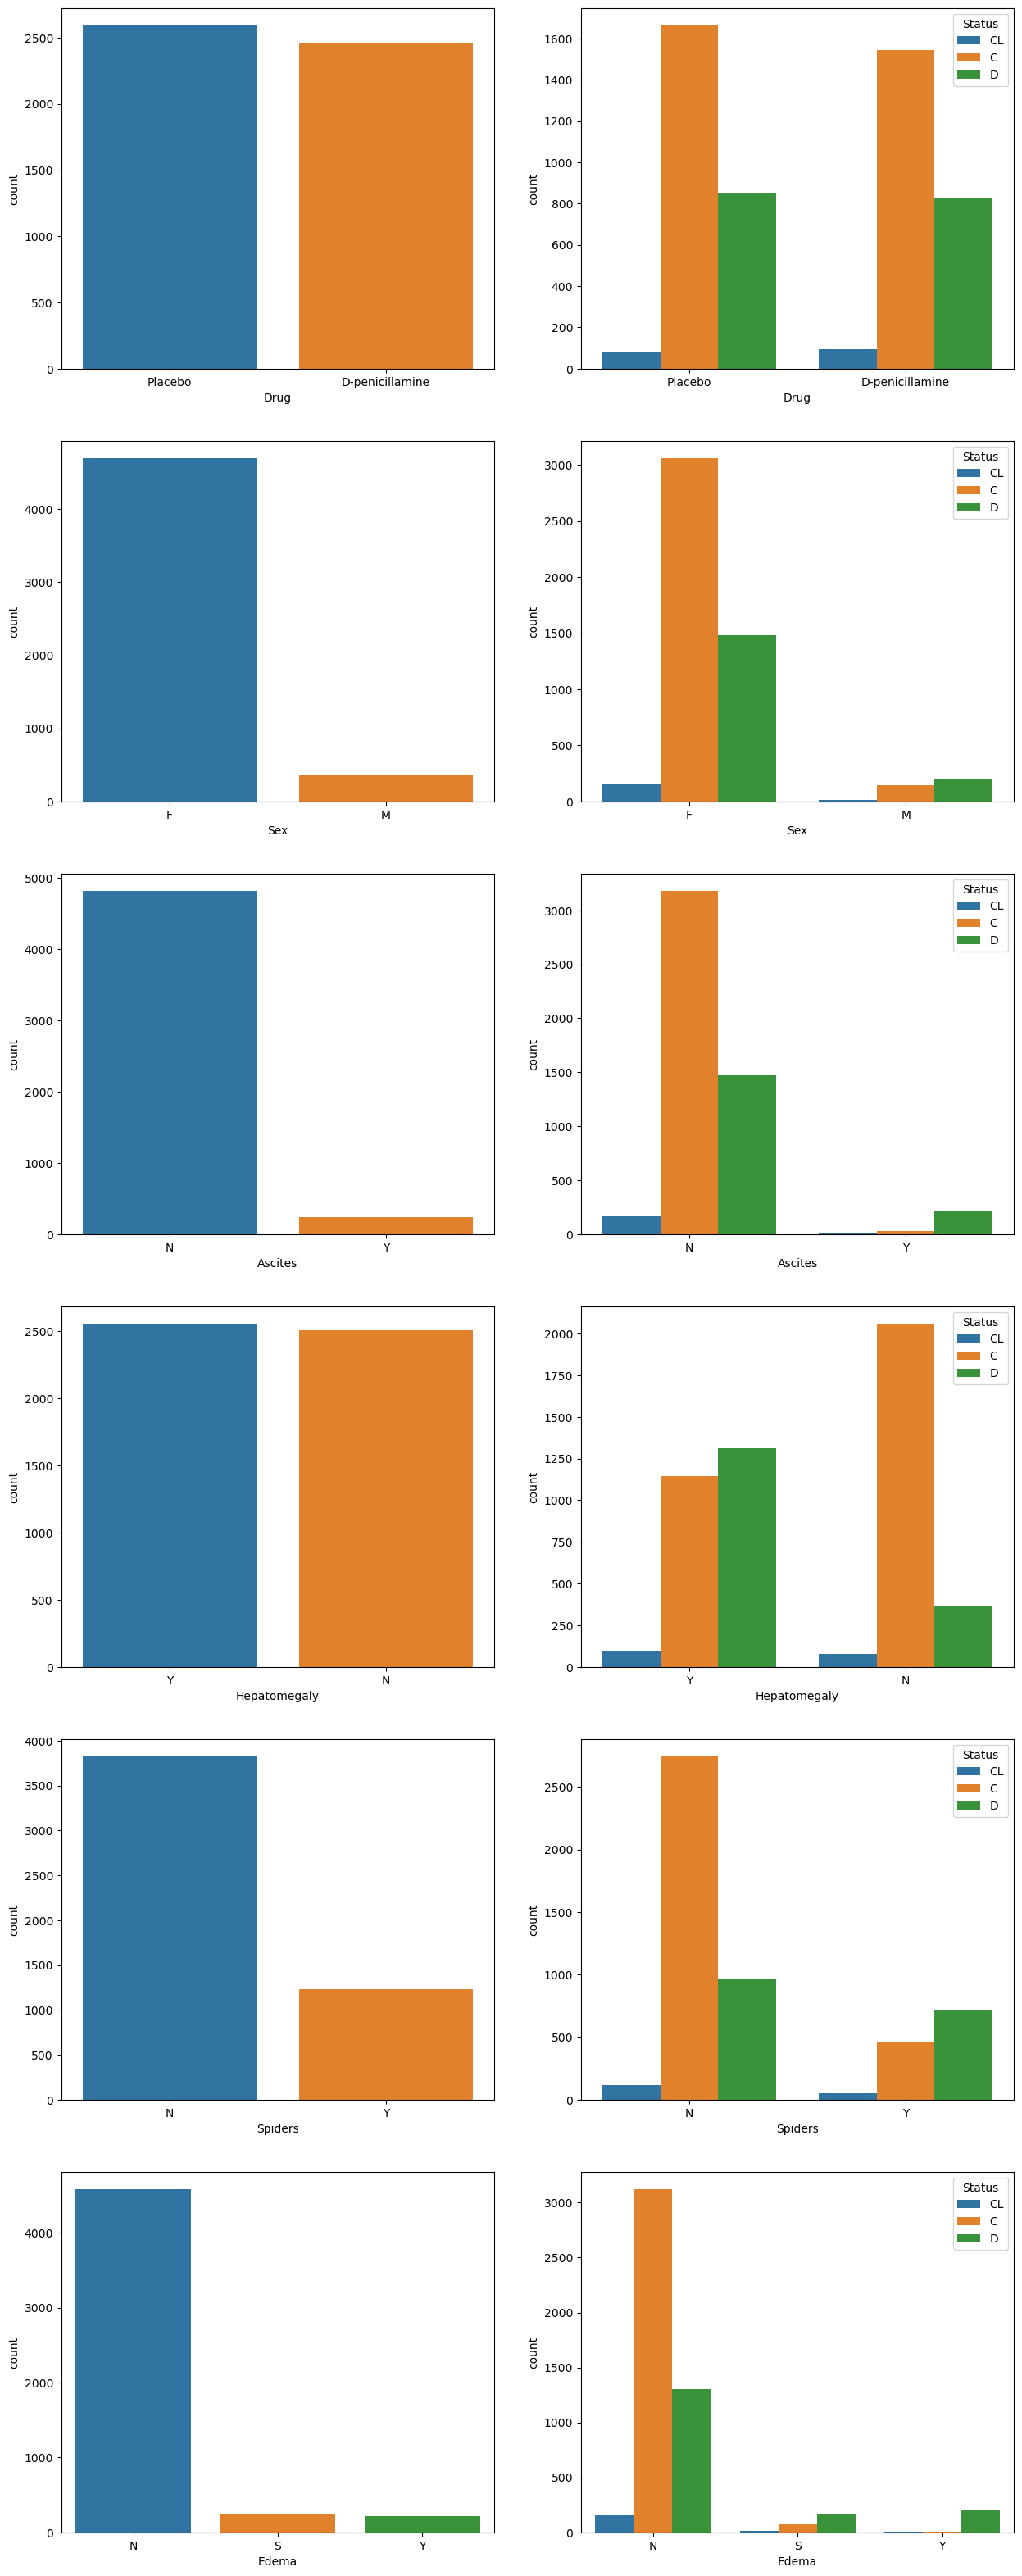

In [14]:
fig, ax = plt.subplots(len(categorical_columns)-1,2,figsize=(15,40))

for i, column_name in zip(ax,categorical_columns):
    
    sns_name = sns.countplot(train_data[[column_name, 'Status']], x=column_name, ax=i[0])
    sns_name.set_xticklabels(sns_name.get_xticklabels(), rotation=0)
    
    sns_name = sns.countplot(train_data[[column_name, 'Status']], x=column_name, hue='Status', ax=i[1])
    sns_name.set_xticklabels(sns_name.get_xticklabels(), rotation=0)

## Visualizing data with histograms

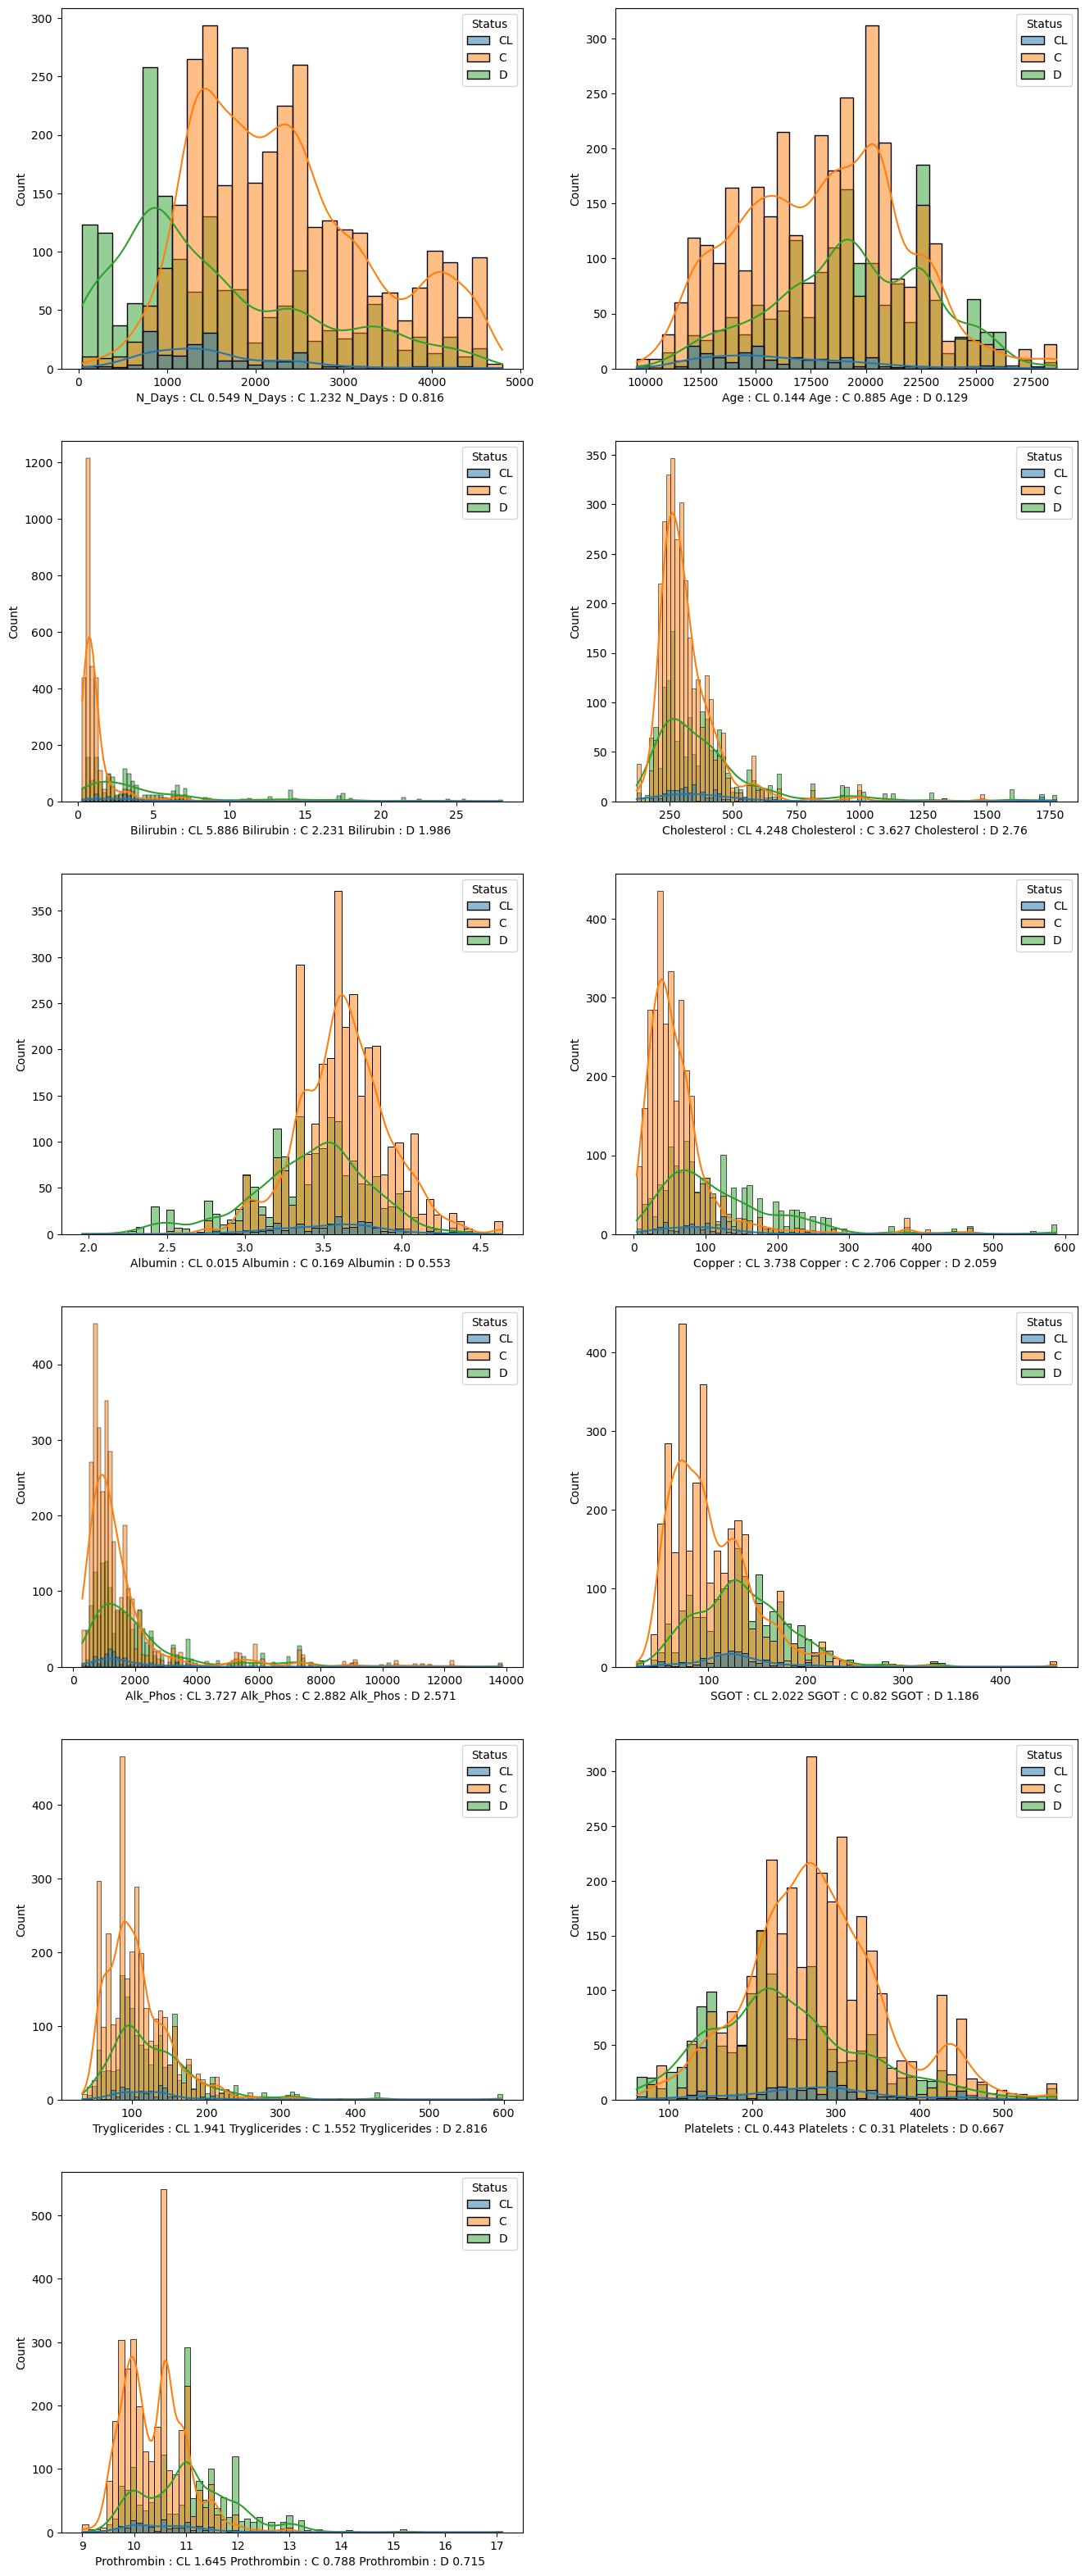

In [29]:
fig, ax = plt.subplots(len(numerical_columns)//2+1,2, figsize=(16,40))
ax = ax.flatten()
ax[-1].axis('off')
k=0

for i in numerical_columns: 
    skew_data = np.abs(train_data.groupby(target)[i].skew())
    names = train_data[target].unique()
    list_names = list()
    for l in range(len(names)):
        list_names.append(np.round(skew_data.iloc[l], decimals=3))
    
    plot_type_num = sns.histplot(data=train_data[[i, target]], x=i, kde=True, hue=train_data[target], ax=ax[k])
    z = ''
    for l1, l2 in enumerate(names):
        z = z + i + ' : ' + str(l2) + ' ' + str(list_names[l1]) + ' ' 
    plot_type_num.set(xlabel=z)
    # if k == 0:
    #     plot_type_num.set_title('Wine')

    k = k + 1

## Correlations

In [16]:
x_axis, y_axis, corr_axis = list(), list(), list()
corr_num = train_data[numerical_columns].corr()
print('Correlation is greater than 0.3\n')
for i in range(len(numerical_columns)):
    for j in range(i+1,len(numerical_columns)):
        a = corr_num[numerical_columns[i]][numerical_columns[j]]
        if np.abs(a) > 0.3:
            print(numerical_columns[i], ', ', numerical_columns[j], ': ', a, '\n')
            x_axis.append(numerical_columns[j])
            y_axis.append(numerical_columns[i])
            corr_axis.append(a)

Correlation is greater than 0.3

N_Days ,  Bilirubin :  -0.3511672803960815 

Bilirubin ,  Cholesterol :  0.3070577959403266 

Bilirubin ,  Albumin :  -0.3035126689281826 

Bilirubin ,  Copper :  0.4501811662539504 

Bilirubin ,  SGOT :  0.36008615495046764 

Bilirubin ,  Tryglicerides :  0.313799113249268 

Bilirubin ,  Prothrombin :  0.3073595904886001 

Cholesterol ,  SGOT :  0.3252284554181313 

Copper ,  SGOT :  0.31803138337135567 



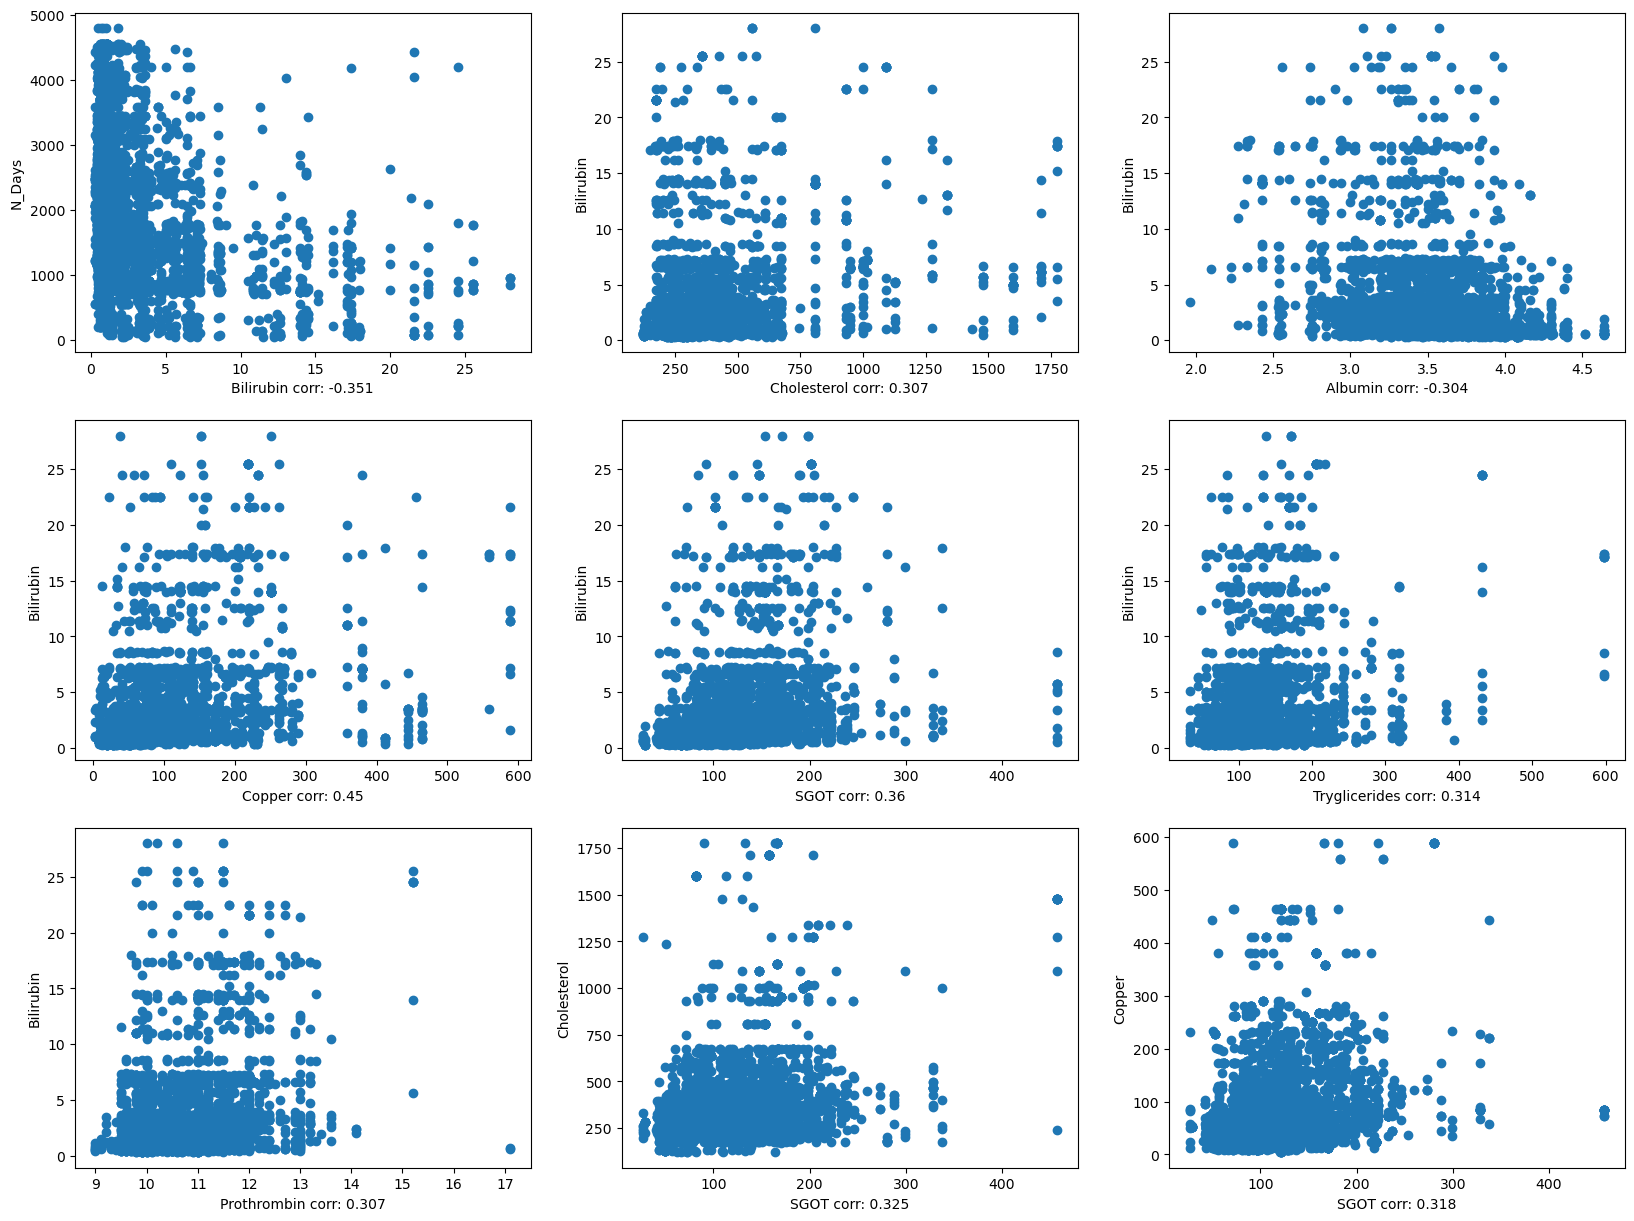

In [17]:
fig, ax = plt.subplots(len(x_axis)//3 ,3, figsize=(20,15))
ax = ax.flatten()
# ax[-1].axis('off')

for i, j in enumerate(ax):
    j.scatter(train_data[x_axis[i]], train_data[y_axis[i]])
    j.set_xlabel(x_axis[i] + ' corr: ' + str(np.round(corr_axis[i], decimals=3)))
    j.set_ylabel(y_axis[i])

In [18]:
corr_num

N_Days       Age  Bilirubin  Cholesterol   Albumin    Copper  \
N_Days         1.000000 -0.106959  -0.351167    -0.147525  0.251328 -0.271756   
Age           -0.106959  1.000000   0.100675    -0.058310 -0.113484  0.103459   
Bilirubin     -0.351167  0.100675   1.000000     0.307058 -0.303513  0.450181   
Cholesterol   -0.147525 -0.058310   0.307058     1.000000 -0.084050  0.161422   
Albumin        0.251328 -0.113484  -0.303513    -0.084050  1.000000 -0.218767   
Copper        -0.271756  0.103459   0.450181     0.161422 -0.218767  1.000000   
Alk_Phos      -0.027639  0.021223   0.152892     0.153086 -0.086555  0.123641   
SGOT          -0.242292 -0.022110   0.360086     0.325228 -0.205160  0.318031   
Tryglicerides -0.190173  0.026448   0.313799     0.270007 -0.120700  0.287920   
Platelets      0.136039 -0.102582  -0.080863     0.089592  0.146873 -0.113497   
Prothrombin   -0.146025  0.139875   0.307360     0.014507 -0.203636  0.242899   

               Alk_Phos      SGOT  Tryglicerides  Platelets  Prothrombin  
N_Days        -0.027639 -0.242292      -0.190173   0.136039    -0.146025  
Age            0.021223 -0.022110       0.026448  -0.102582     0.139875  
Bilirubin      0.152892  0.360086       0.313799  -0.080863     0.307360  
Cholesterol    0.153086  0.325228       0.270007   0.089592     0.014507  
Albumin       -0.086555 -0.205160      -0.120700   0.146873    -0.203636  
Copper         0.123641  0.318031       0.287920  -0.113497     0.242899  
Alk_Phos       1.000000  0.144761       0.102431   0.034971     0.077746  
SGOT           0.144761  1.000000       0.142844  -0.054605     0.146554  
Tryglicerides  0.102431  0.142844       1.000000  -0.004717     0.073020  
Platelets      0.034971 -0.054605      -0.004717   1.000000    -0.173709  
Prothrombin    0.077746  0.146554       0.073020  -0.173709     1.000000

<Axes: >

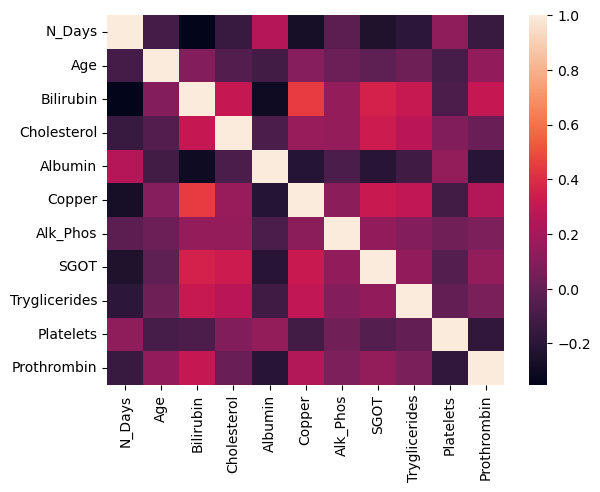

In [19]:
sns.heatmap(corr_num)

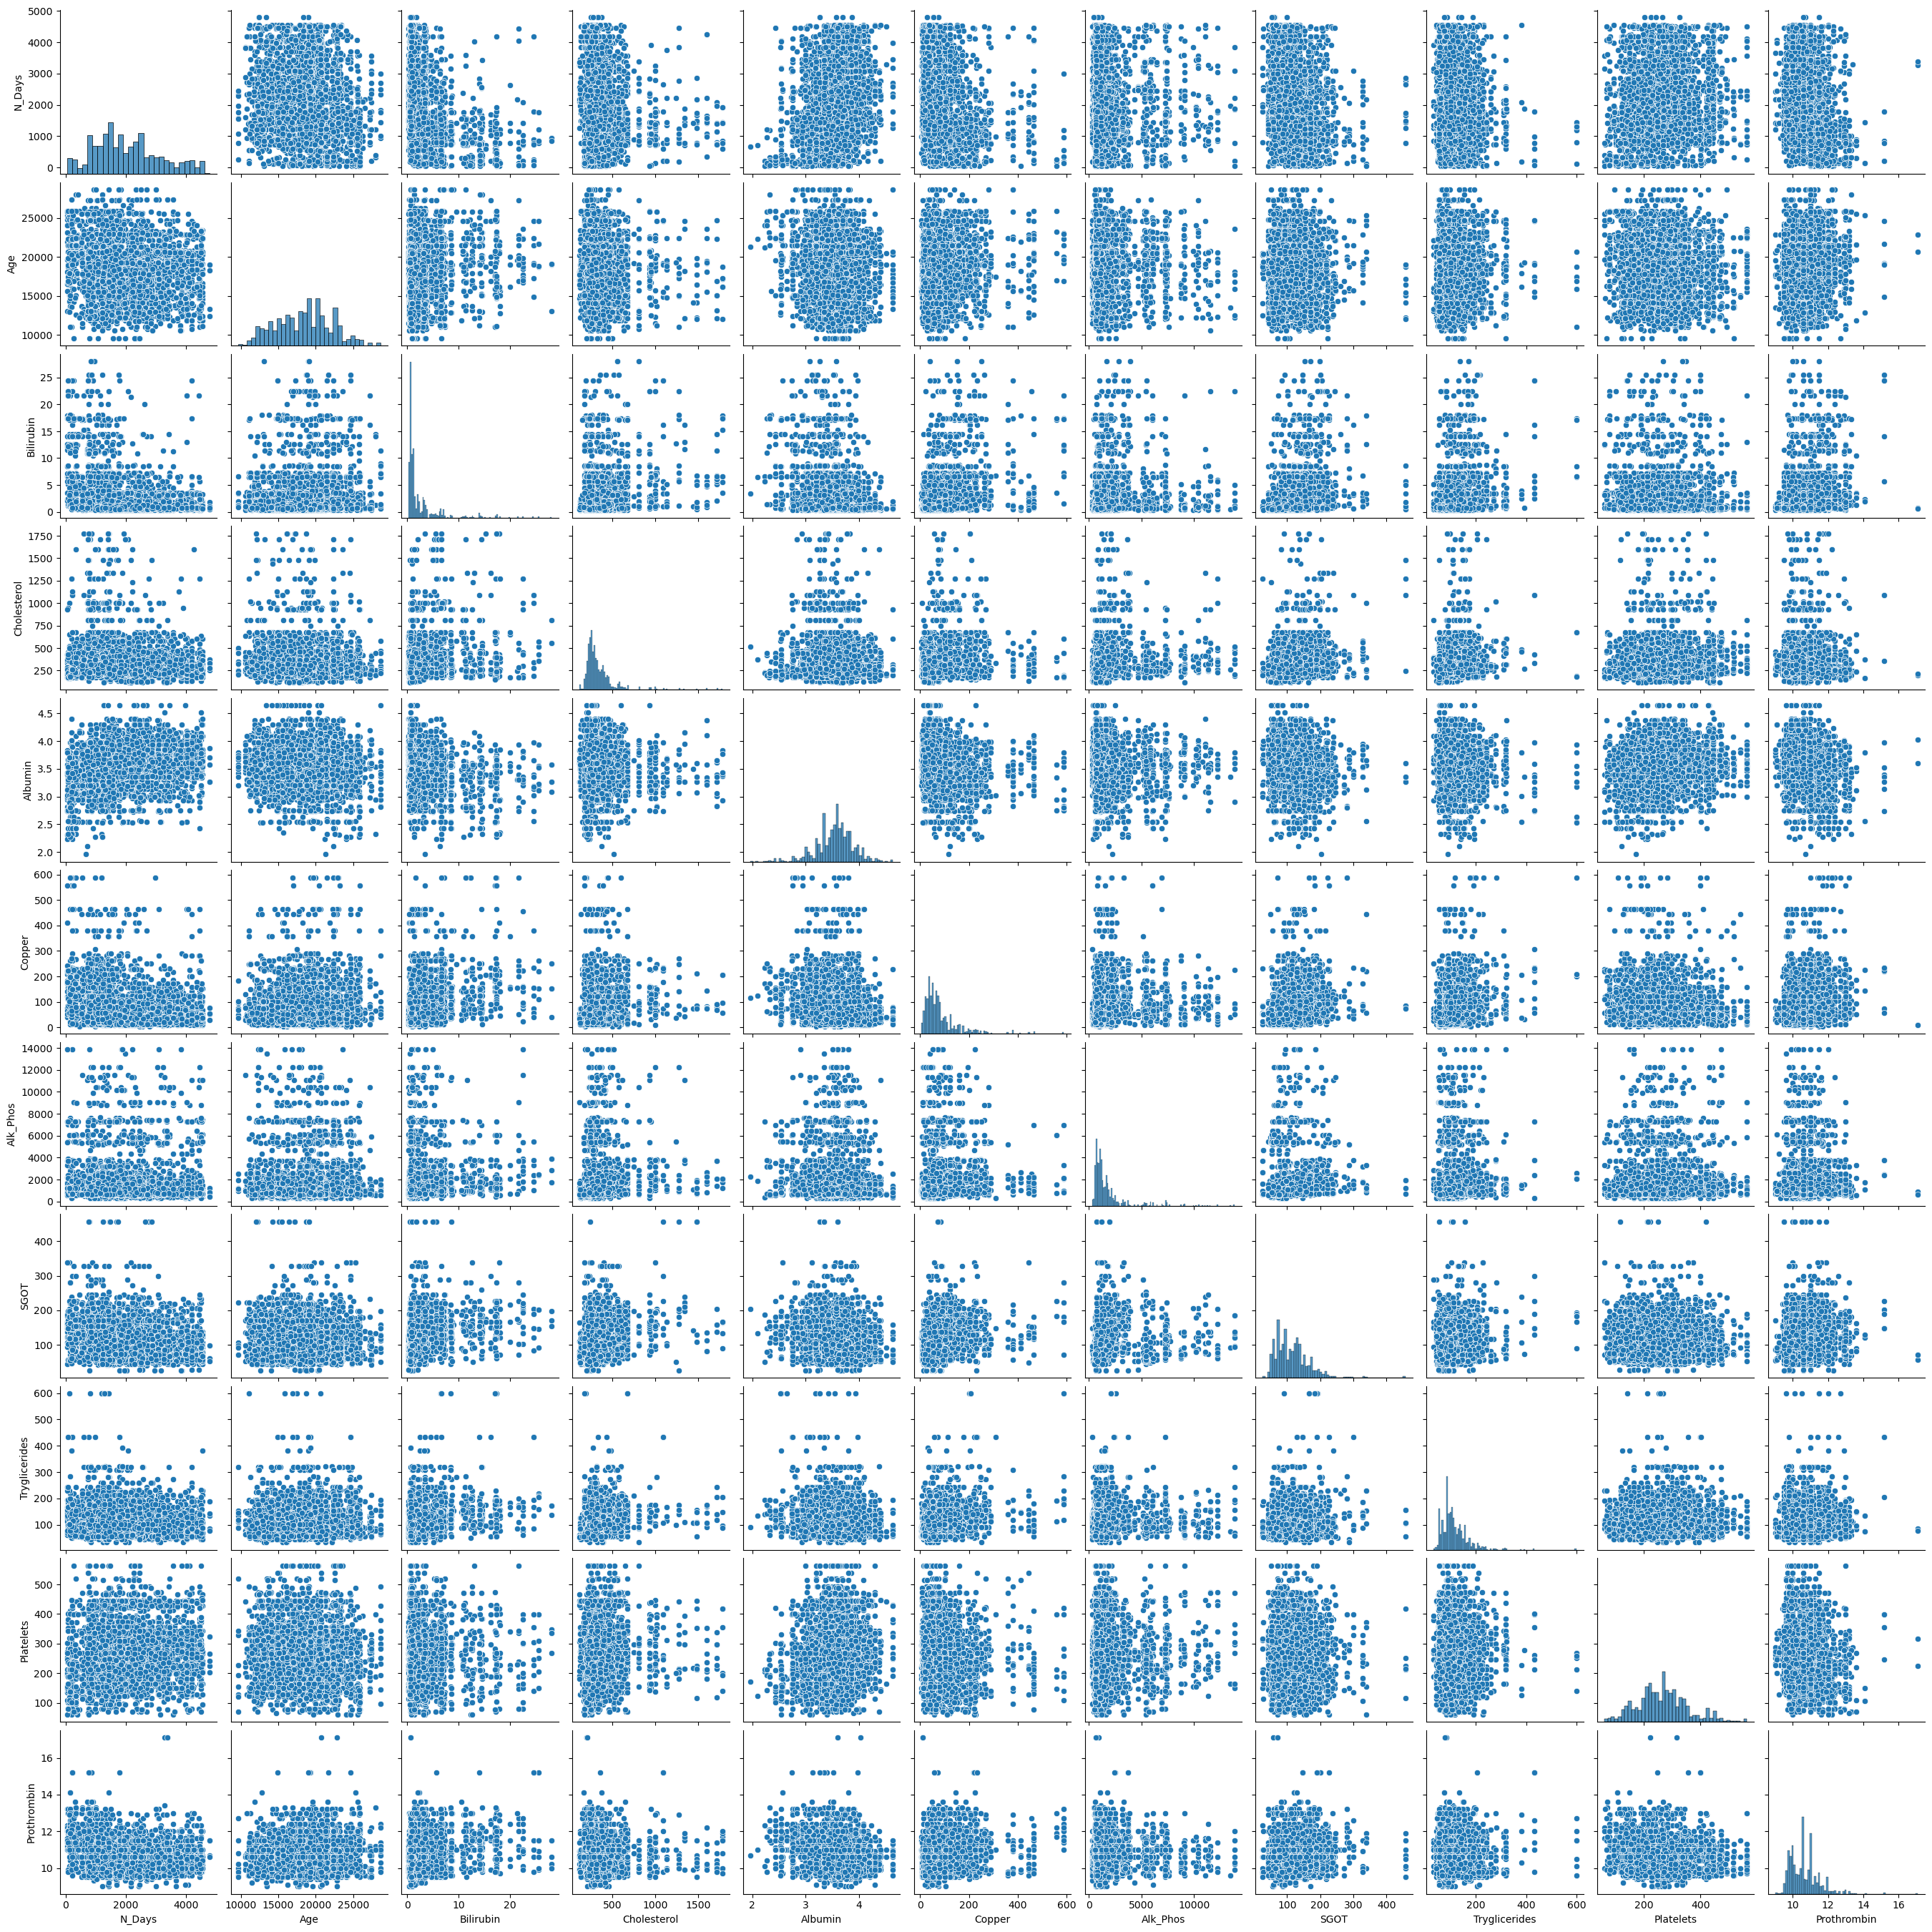

In [20]:
sns.pairplot(train_data[numerical_columns])

## Visualizing data with box

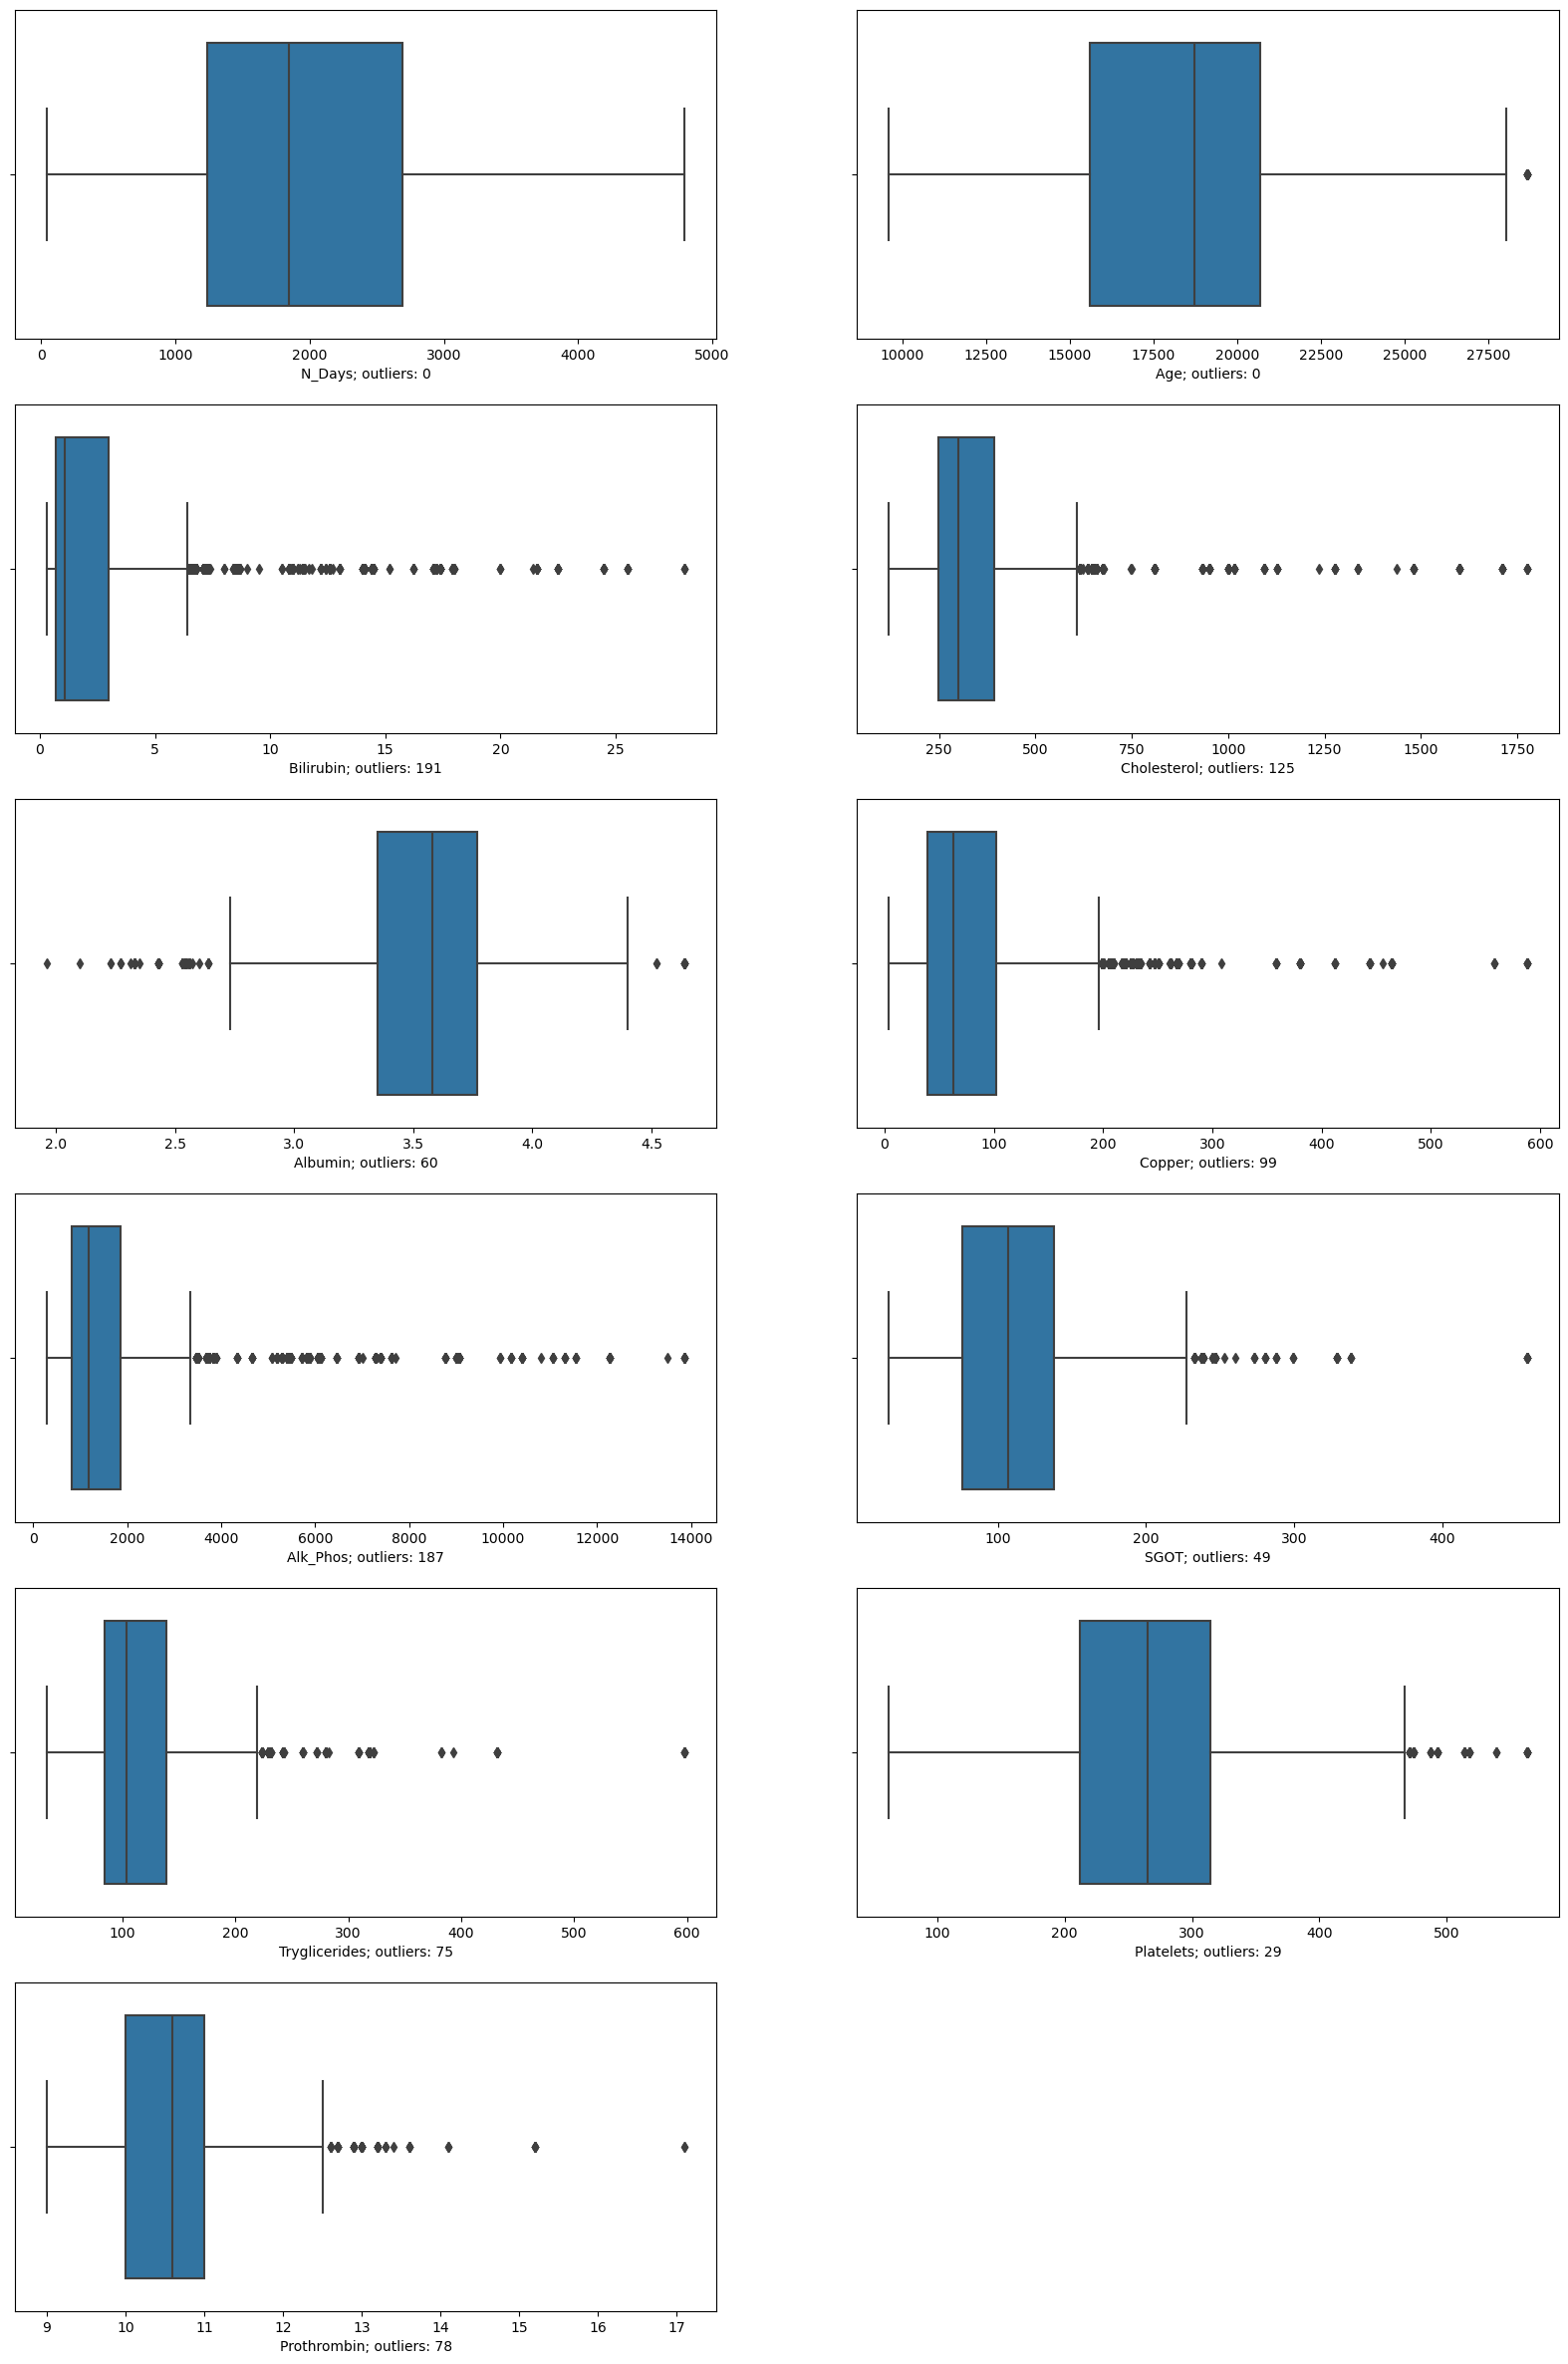

In [21]:
len_numerical_columns = len(numerical_columns)
fig, axes = plt.subplots(len_numerical_columns//2+1,2,figsize=(20,30))
ax = axes.flatten()
ax[-1].set_axis_off()

for i, ax in enumerate(ax):
    if len_numerical_columns == i:
        continue
    z_score = stats.zscore(train_data[numerical_columns[i]])
    z_abs = (np.abs(z_score) > 3).sum()
    
    boxplot = sns.boxplot(x=train_data[numerical_columns].iloc[:,i],ax=ax)
    boxplot.set(xlabel=numerical_columns[i] + '; outliers: ' + str(z_abs))

## Data Preprocessing

In [22]:
current_categorical_columns = categorical_columns[:-1].copy()

for i in current_categorical_columns:
    if len(train_data[i].unique()) == 2:
        
        encoder = OneHotEncoder(drop='if_binary', sparse_output=False)
        
        train_data = pd.concat([pd.DataFrame(encoder.fit_transform(train_data[i].iloc[:].values.reshape(-1,1)), columns=[i+'_ohe']), train_data], axis=1)
        train_data.drop([i], axis=1, inplace=True)
        
        validation_data = pd.concat([pd.DataFrame(encoder.transform(validation_data[i].iloc[:].values.reshape(-1,1)), columns=[i+'_ohe']), validation_data], axis=1)
        validation_data.drop([i], axis=1, inplace=True)
        
        test_data = pd.concat([pd.DataFrame(encoder.transform(test_data[i].iloc[:].values.reshape(-1,1)), columns=[i+'_ohe']), test_data], axis=1)
        test_data.drop([i], axis=1, inplace=True)
    else:
        encoder = OneHotEncoder(drop='first', sparse_output=False) 
        
        train_data = pd.concat([pd.DataFrame(encoder.fit_transform(train_data[i].iloc[:].values.reshape(-1,1)), columns=[
            i+'_0', i+'_1']), train_data], axis=1)
        train_data.drop([i], axis=1, inplace=True)
        
        validation_data = pd.concat([pd.DataFrame(encoder.transform(validation_data[i].iloc[:].values.reshape(-1,1)), columns=[
            i+'_0', i+'_1']), validation_data], axis=1)
        validation_data.drop([i], axis=1, inplace=True)

        test_data = pd.concat([pd.DataFrame(encoder.transform(test_data[i].iloc[:].values.reshape(-1,1)), columns=[
            i+'_0', i+'_1']), test_data], axis=1)
        test_data.drop([i], axis=1, inplace=True)


In [23]:
train_data.to_csv('data/train.csv', index_label=False)
validation_data.to_csv('data/validation.csv', index_label=False)
test_data.to_csv('data/test.csv', index_label=False)